In [5]:
import numpy as np
import glob
import re

# ファイル一覧取得
files = glob.glob("../output/bernstein/Ez_t_blockid_z_*.dat")

# block_id でソート
def extract_block_id(fname):
    return int(re.search(r'blockid_z_(\d+)', fname).group(1))

files.sort(key=extract_block_id)

# 各ブロック読み込み
data_blocks = [np.loadtxt(f) for f in files]

# shape確認
for i, d in enumerate(data_blocks):
    print(f"block {i}: {d.shape}")

# 横方向に結合（z方向に並べる）
Ez_global = np.hstack(data_blocks)


block 0: (200000, 16)
block 1: (200000, 16)
block 2: (200000, 16)
block 3: (200000, 16)
block 4: (200000, 16)
block 5: (200000, 16)
block 6: (200000, 16)
block 7: (200000, 16)
block 8: (200000, 16)
block 9: (200000, 16)
block 10: (200000, 16)
block 11: (200000, 16)
block 12: (200000, 16)
block 13: (200000, 16)
block 14: (200000, 16)
block 15: (200000, 16)


In [6]:
Ez_global.shape

(200000, 256)

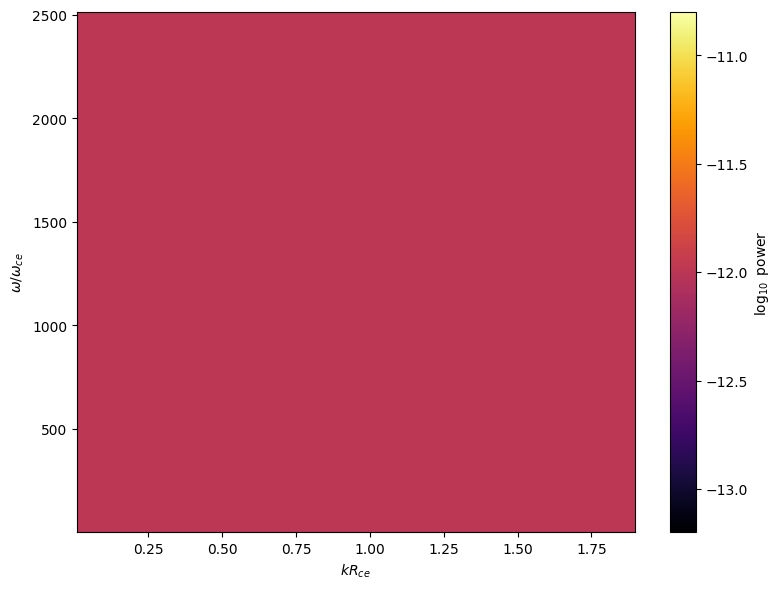

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# 物理パラメータ
# ======================
c = 3e8
omega_pe = 564102.5
omega_ce = omega_pe/4.
v_th = 0.003 * c
R_ce = v_th / omega_ce

dx = 1.65 * R_ce
dt = 0.005 / omega_pe

Nt, Nx = Ez_global.shape

# ======================
# 必須①：時間平均除去（ω=0対策）
# ======================
Ez_global = Ez_global - Ez_global.mean(axis=0, keepdims=True)

# ======================
# FFT
# ======================
E_k = np.fft.fft(Ez_global, axis=1)
k = 2*np.pi*np.fft.fftfreq(Nx, d=dx)

E_wk = np.fft.fft(E_k, axis=0)
omega = 2*np.pi*np.fft.fftfreq(Nt, d=dt)

power = np.abs(E_wk)**2

# ======================
# 必須②：ω>0 のみ
# ======================
om_mask = omega > 0
k_mask = k > 0

omega = omega[om_mask]
k = k[k_mask]
power = power[np.ix_(om_mask, k_mask)]

# ======================
# kごと正規化
# ======================
#power /= power.max(axis=0, keepdims=True)

# ======================
# log 表示
# ======================
log_power = np.log10(power + 1e-12)

# ======================
# 軸の選択
# ======================
use_normalized_axis = True


if use_normalized_axis:
    k_plot = k * R_ce
    omega_plot = omega / omega_ce
    xlabel = r"$kR_{ce}$"
    ylabel = r"$\omega/\omega_{ce}$"
    #ylim = (0, 2.0)
else:
    k_plot = k
    omega_plot = omega
    xlabel = r"$k\,[\mathrm{rad/m}]$"
    ylabel = r"$\omega\,[\mathrm{rad/s}]$"
    ylim = (0, omega.max())

# ======================
# 描画
# ======================
plt.figure(figsize=(8,6))
plt.pcolormesh(k_plot, omega_plot, log_power,
               shading="auto", cmap="inferno")
plt.colorbar(label=r"$\log_{10}$ power")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.xlim((0.,1.5))
plt.ylim((0.,2.))
plt.tight_layout()
plt.show()


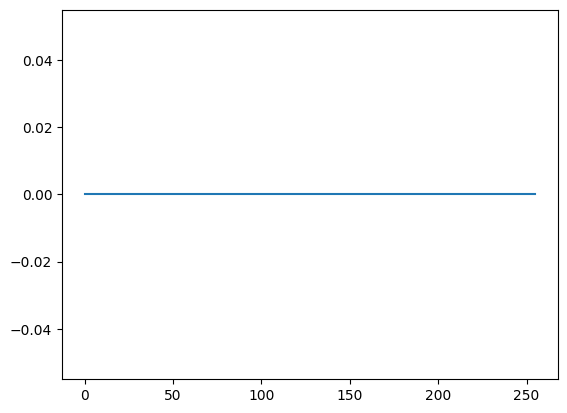

In [10]:
plt.plot(Ez_global[1])